In [2]:
import mne
import numpy as np

In [11]:
from mne_bids import BIDSPath, read_raw_bids

bids_root = r"ds005841-download"

subject_id = "001"
task = "regperp"    # lumfront, lumperp, regfront, regperp, signalscreen, signalvr -> Was ist signalscreen, signalvr?

bids_path = BIDSPath(
    subject=subject_id,
    task=task,
    datatype="eeg",
    suffix="eeg",
    extension=".bdf",
    root=bids_root
)

print(bids_path.fpath)

raw = read_raw_bids(bids_path)
raw.load_data()

ds005841-download\sub-001\eeg\sub-001_task-regperp_eeg.bdf
Extracting EDF parameters from d:\lisa-\Universität_2\Master\2. Semester\EEG\EEG_Project\ds005841-download\sub-001\eeg\sub-001_task-regperp_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from ds005841-download\sub-001\eeg\sub-001_task-regperp_events.tsv.
Reading 0 ... 216063  =      0.000 ...   421.998 secs...


C:\Users\lisa-\AppData\Local\Temp\ipykernel_20536\1728651223.py:19: RuntimeWarning: Did not find any channels.tsv associated with sub-001_task-regperp.

The search_str was "ds005841-download\sub-001\**\eeg\sub-001*channels.tsv"
  raw = read_raw_bids(bids_path)


<RawEDF | sub-001_task-regperp_eeg.bdf, 73 x 216064 (422.0 s), ~120.4 MiB, data loaded>

In [12]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('RAND_DARK'), np.str_('RAND_LIGHT'), np.str_('REF_DARK'), np.str_('REF_LIGHT')]
{np.str_('RAND_DARK'): 1, np.str_('RAND_LIGHT'): 2, np.str_('REF_DARK'): 3, np.str_('REF_LIGHT'): 4}


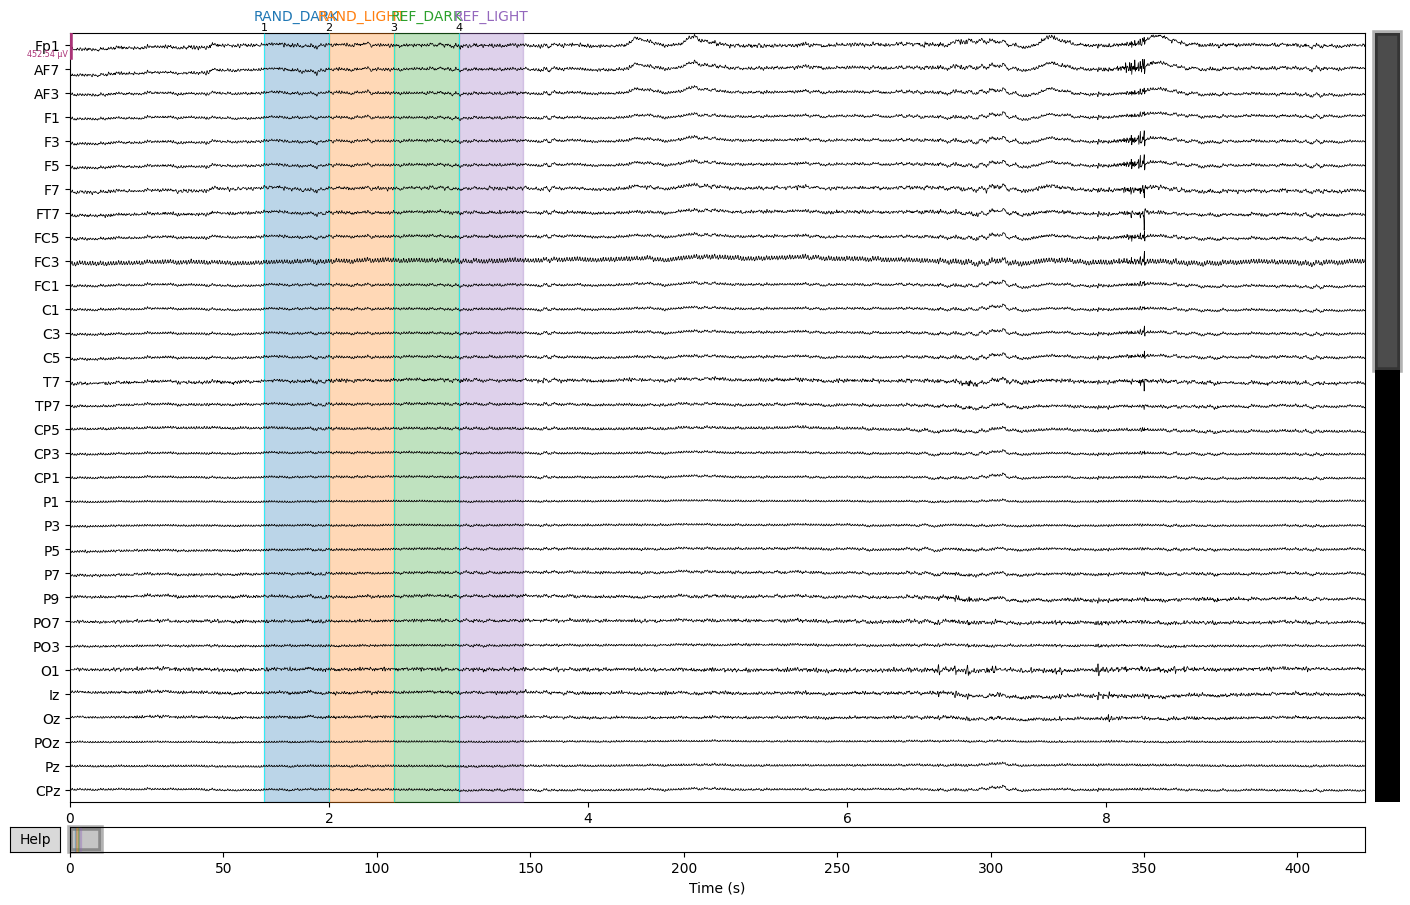

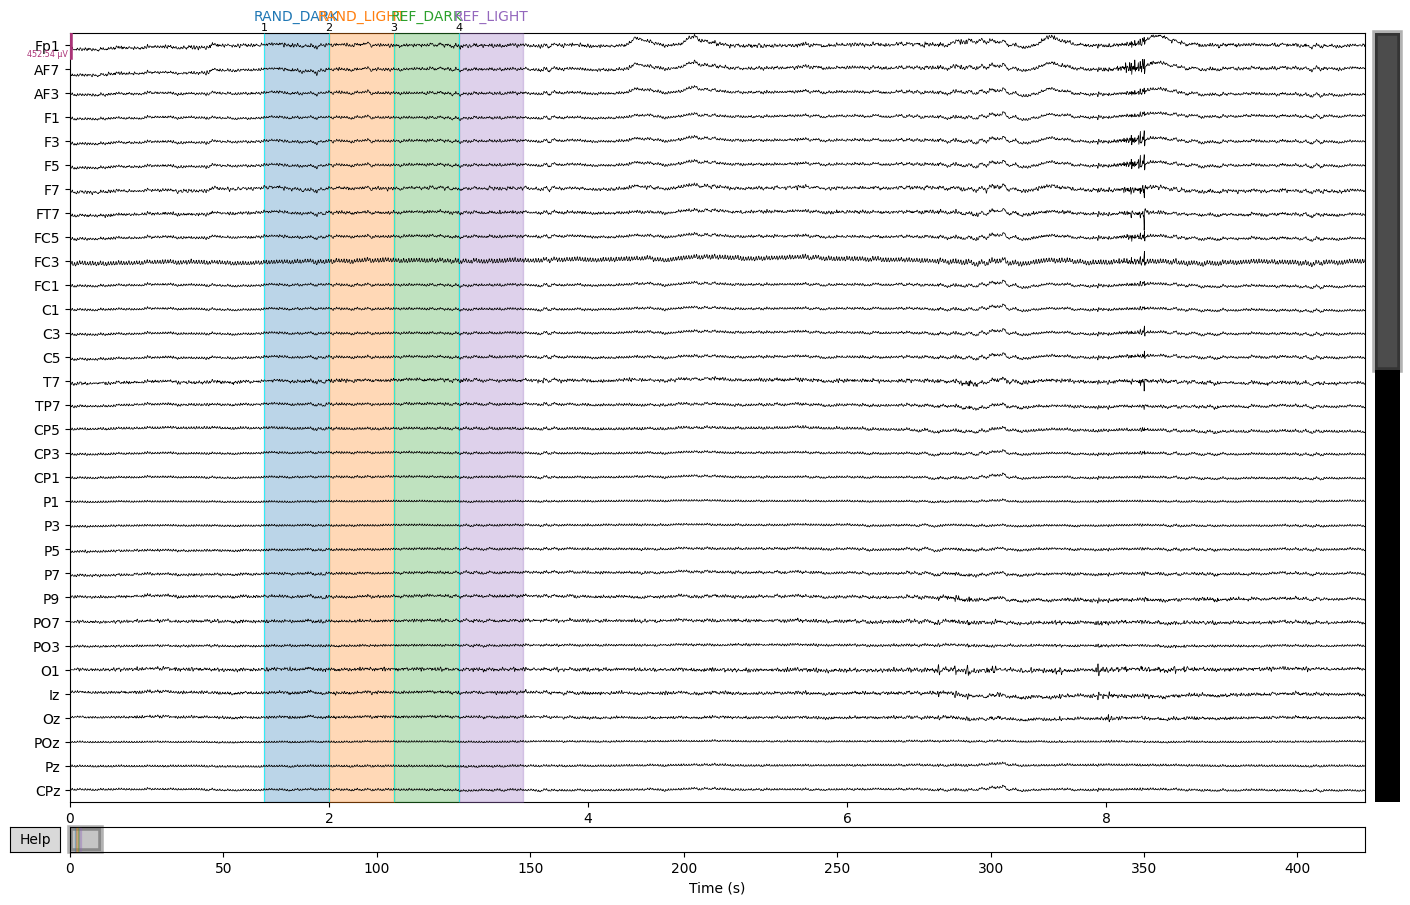

In [13]:
#%matplotlib qt
raw.plot(events=events, block=True, scalings='auto', duration=10, n_channels=32)